# API Data Wrangling with Open-Meteo

In this exercise, we will:

- Fetch historical weather data using the **Open-Meteo API**.
- Parse and clean the data using **pandas**.
- Perform exploratory data analysis.
- Visualize weather trends.

In [2]:
# Install required packages if not already installed
# !pip install requests pandas matplotlib --quiet

## Understand the Open-Meteo API

- **API Endpoint**: `https://archive-api.open-meteo.com/v1/archive`
- **Parameters**:
  - `latitude`: Latitude of the location.
  - `longitude`: Longitude of the location.
  - `start_date`: Start date of the data (YYYY-MM-DD).
  - `end_date`: End date of the data (YYYY-MM-DD).
  - `hourly`: Comma-separated list of variables (e.g., temperature, precipitation).
  - `timezone`: Timezone of the data.

**Documentation**: [Open-Meteo API Docs](https://open-meteo.com/en/docs)

## Exercises for Students

Now it's your turn! Below are some exercises to reinforce what you've learned. Try to complete them without looking at the solutions.

### Exercise: Compare Rainfall Between London and Seattle

- **Objective**: Compare the total weekly rainfall between London and Seattle over a full year.
- **Tasks**:
  1. **Fetch Data**: Retrieve hourly precipitation data for London and Seattle for the year 2022.
     - **London Coordinates**: Latitude `51.5074`, Longitude `-0.1278`
     - **Seattle Coordinates**: Latitude `47.6062`, Longitude `-122.3321`
  2. **Data Cleaning**: Convert the time columns to datetime objects and set them as the index. Handle any missing values.
  3. **Resample Data**: Resample the hourly data to weekly totals.
  4. **Visualization**: Plot the weekly total precipitation for both cities on the same graph.
  5. **Analysis**: Determine which city had more rainfall overall and identify any interesting patterns.

**Note**: Remember to handle any API limitations, such as data availability or rate limits, and to be mindful of the size of the data you're requesting.

### Tips:

- **API Parameters**: Make sure to adjust the parameters like `latitude`, `longitude`, `start_date`, `end_date`, `hourly`, and `timezone` as needed.
- **Error Handling**: Always check if your API requests are successful before proceeding.
- **Data Storage**: Consider saving your DataFrames to CSV files for future analysis.
- **Visualization**: Customize your plots with titles, labels, legends, and gridlines for better readability.

Happy coding!


In [8]:
# Import Libraries
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Optional: Configure matplotlib for inline display in Jupyter
%matplotlib inline

In [10]:
#Step 1: Set up parameters for London first

#London coordinates
latitude_london = 51.5074
longitude_london = -0.1278

#Date range = 1 full year
start_date = '2022-01-01'
end_date = '2022-12-31'

#Data to fetch: hourly precip
hourly_precipitation_london = ['precipitation']

In [12]:
# Step 2: API Request

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params_london = {
    'latitude': latitude_london,
    'longitude': longitude_london,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_precipitation_london),
    'timezone': 'Europe/London'
}

response_london = requests.get(base_url, params=params_london)

In [14]:
print(params_london)
print(response_london)

{'latitude': 51.5074, 'longitude': -0.1278, 'start_date': '2022-01-01', 'end_date': '2022-12-31', 'hourly': 'precipitation', 'timezone': 'Europe/London'}
<Response [200]>


In [16]:
# Check API request

if response_london.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')


Data fetched successfully!


In [26]:
# Step 3: load data to pd df
data = response_london.json()
hourly_precipitation_london = data['hourly']

df_london = pd.DataFrame(hourly_precipitation_london)
df_london.head()

,time,precipitation
0,2022-01-01T00:00,0.0
1,2022-01-01T01:00,0.0
2,2022-01-01T02:00,0.0
3,2022-01-01T03:00,0.0
4,2022-01-01T04:00,0.0


In [28]:
print(df_london)

                  time  precipitation
0     2022-01-01T00:00            0.0
1     2022-01-01T01:00            0.0
2     2022-01-01T02:00            0.0
3     2022-01-01T03:00            0.0
4     2022-01-01T04:00            0.0
...                ...            ...
8755  2022-12-31T19:00            0.0
8756  2022-12-31T20:00            0.0
8757  2022-12-31T21:00            0.0
8758  2022-12-31T22:00            0.3
8759  2022-12-31T23:00            0.3

[8760 rows x 2 columns]


In [30]:
# Step 4: Data Cleaning

# Convert 'time' column to datetime
df_london['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df_london.set_index('time', inplace=True)

# Check for missing values
df_london.isnull().sum()


precipitation    0
dtype: int64

In [32]:
#Handling missing values 
df_london.fillna(method='ffill', inplace=True)  # Forward fill

/var/folders/k9/14wtpz7n6dz958nl7hkt64lw0000gn/T/ipykernel_33896/3814249023.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_london.fillna(method='ffill', inplace=True)  # Forward fill


In [34]:
#Step 5 EDA
#summary stats
df_london.describe()

,precipitation
count,8760.000000
mean,0.075696
std,0.404506
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,14.700000


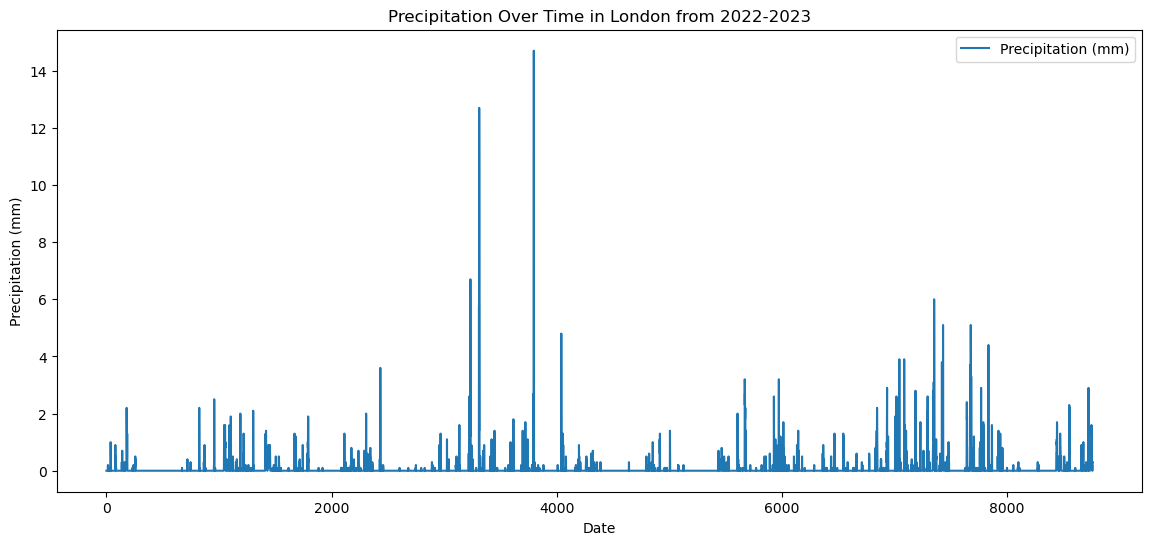

In [36]:
# Visualizations
# plot precipitation over time in London

plt.figure(figsize=(14, 6))
plt.plot(df.index, df_london['precipitation'], label='Precipitation (mm)')
plt.title('Precipitation Over Time in London from 2022-2023')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()

In [38]:
# Step 7: Resample Data to Daily Averages

daily_avg = df_london.resample('D').mean()
daily_avg.head()

,precipitation
time,
2022-01-01,0.008333
2022-01-02,0.083333
2022-01-03,0.000000
2022-01-04,0.104167
2022-01-05,0.000000


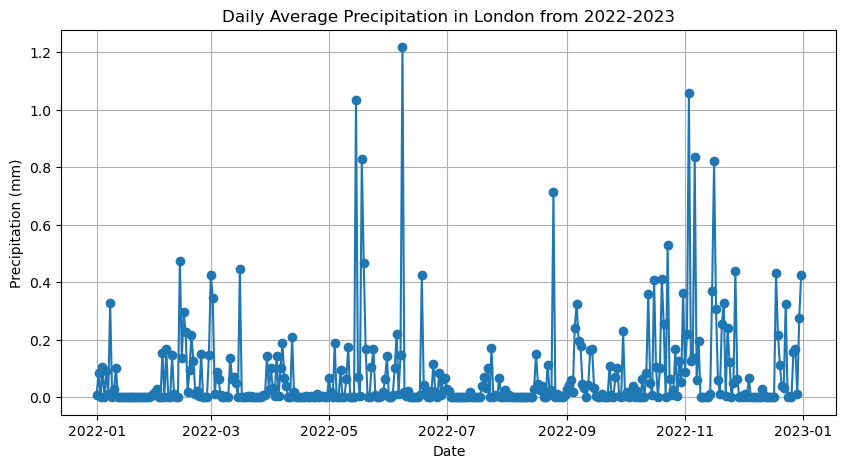

In [40]:
# Plot Daily Average Precipitation

plt.figure(figsize=(10, 5))
plt.plot(daily_avg.index, daily_avg['precipitation'], marker='o')
plt.title('Daily Average Precipitation in London from 2022-2023')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.grid(True)
plt.show()

In [42]:
# Step 8: Compare with Seattle

#base url same as above

# Coordinates Seattle
latitude_sea = 47.6062
longitude_sea = -122.3321

#Data to fetch: hourly precip
hourly_precipitation_sea = ['precipitation']

params_sea = {
    'latitude': latitude_sea,
    'longitude': longitude_sea,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_precipitation_sea),
    'timezone': 'America/Los_Angeles'
}

response_sea = requests.get(base_url, params=params_sea)

# Load and clean Seattle data
data_sea = response_sea.json()
hourly_data_sea = data_sea['hourly']
df_sea = pd.DataFrame(hourly_data_sea)

df_sea['time'] = pd.to_datetime(df_sea['time'])
df_sea.set_index('time', inplace=True)
df_sea.fillna(method='ffill', inplace=True)


/var/folders/k9/14wtpz7n6dz958nl7hkt64lw0000gn/T/ipykernel_33896/4193473544.py:30: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_sea.fillna(method='ffill', inplace=True)


In [54]:
# Resample London Data to Weekly Averages

weekly_avg_london = df_london.resample('W').mean()
weekly_avg_london.head()



,precipitation
time,
2022-01-02,0.045833
2022-01-09,0.076786
2022-01-16,0.018452
2022-01-23,0.000000
2022-01-30,0.002381


In [56]:
# Resample Seattle Data to Weekly Averages

weekly_avg_sea = df_sea.resample('W').mean()
weekly_avg_sea.head()


,precipitation
time,
2022-01-02,0.797917
2022-01-09,0.605952
2022-01-16,0.270833
2022-01-23,0.093452
2022-01-30,0.039286


In [50]:
#print(weekly_avg_london)
#print(weekly_avg_sea)

In [58]:
# Combine DataFrames for Comparison

combined_precipitation = pd.DataFrame({
    'London': weekly_avg_london['precipitation'],
    'Seattle': weekly_avg_sea['precipitation']
})


In [60]:
print(combined_precipitation.head())

              London   Seattle
time                          
2022-01-02  0.045833  0.797917
2022-01-09  0.076786  0.605952
2022-01-16  0.018452  0.270833
2022-01-23  0.000000  0.093452
2022-01-30  0.002381  0.039286


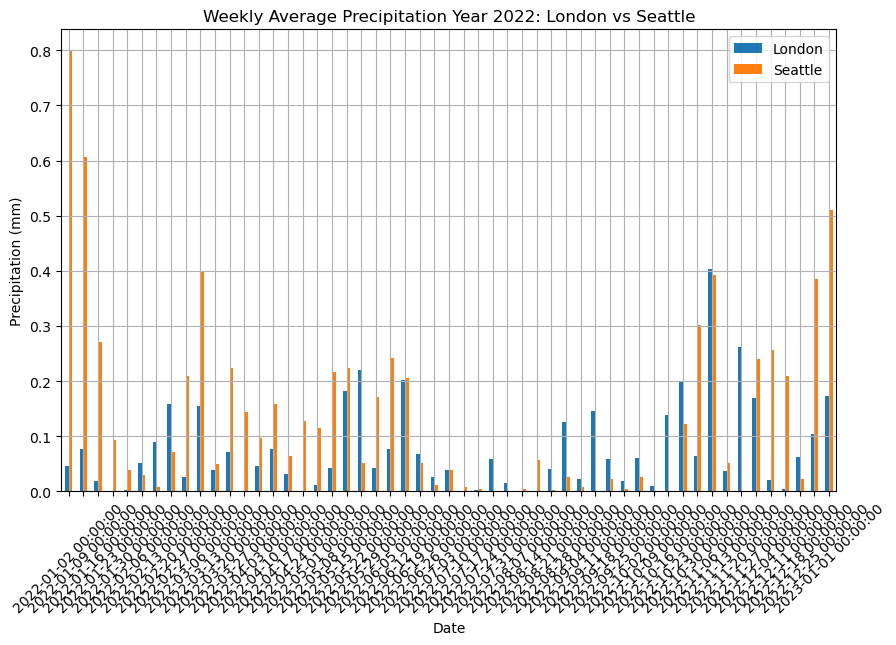

In [64]:
# Plot Comparison of Weekly Average Precipitation

combined_precipitation.plot(kind='bar', figsize=(10, 6))
plt.title('Weekly Average Precipitation Year 2022: London vs Seattle')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [66]:
# Advanced Analysis - Precipitation Difference

# Calculate Precipitation Difference
combined_precipitation['Precipitation Difference'] = combined_precipitation['Seattle'] - combined_precipitation['London']
combined_precipitation

,London,Seattle,Precipitation Difference
time,,,
2022-01-02,0.045833,0.797917,0.752083
2022-01-09,0.076786,0.605952,0.529167
2022-01-16,0.018452,0.270833,0.252381
2022-01-23,0.000000,0.093452,0.093452
2022-01-30,0.002381,0.039286,0.036905
2022-02-06,0.052381,0.030357,-0.022024
2022-02-13,0.090476,0.007143,-0.083333
2022-02-20,0.158929,0.070833,-0.088095
2022-02-27,0.026786,0.209524,0.182738


In [70]:
# Step 10: Save Data to CSV (Optional)

# Save London data
df_london.to_csv('london_weather.csv')

# Save Seattle data
df_sea.to_csv('seattle_weather.csv')